In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
summay_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/summary/"
nmi_matrix_path =  summay_dir + 'nmi_sum_matrix.csv'
df = pd.read_csv(nmi_matrix_path)
ns_ss = 0.01
NMI_TYPES = ['AllNodes', 'Leaves_NoOverlap', 'Leaves_WithOverlap']
SCORES = ['max', 'lfk', 'sum']
pairs = itertools.product(NMI_TYPES, SCORES)
ALL_SCORES_TYPES = [f'{p[0]}_{p[1]}' for p in pairs]
mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
SIZE2COLOR_DICT = {1000: 'b', 10000: 'r'}
class_names = [f'mac_{i}' for i in range(mac_min_range, mac_max_range+1)] + [f'maf_{i / 100}' for i in range(maf_min_range, maf_max_range+1)]

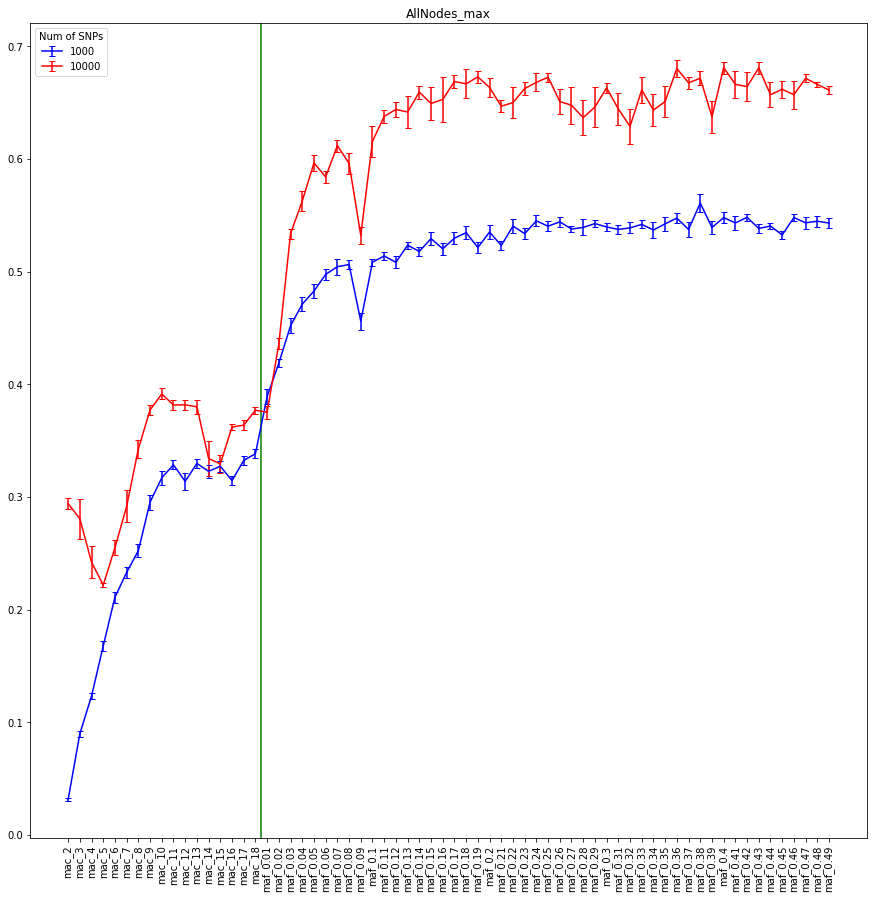

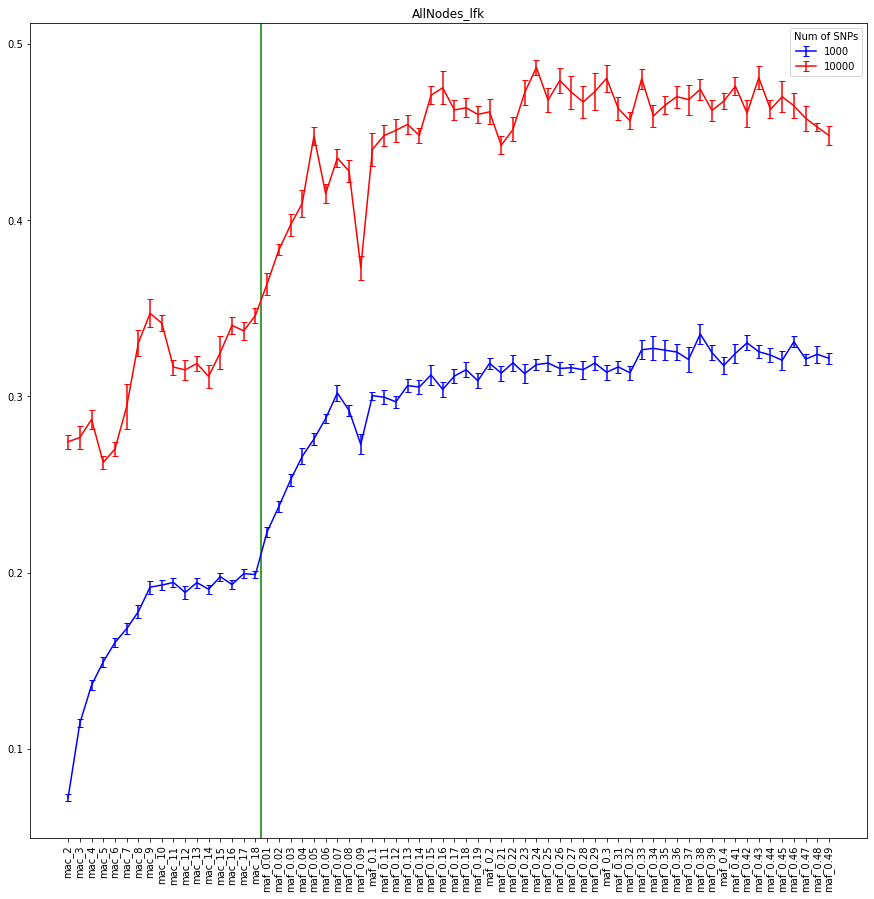

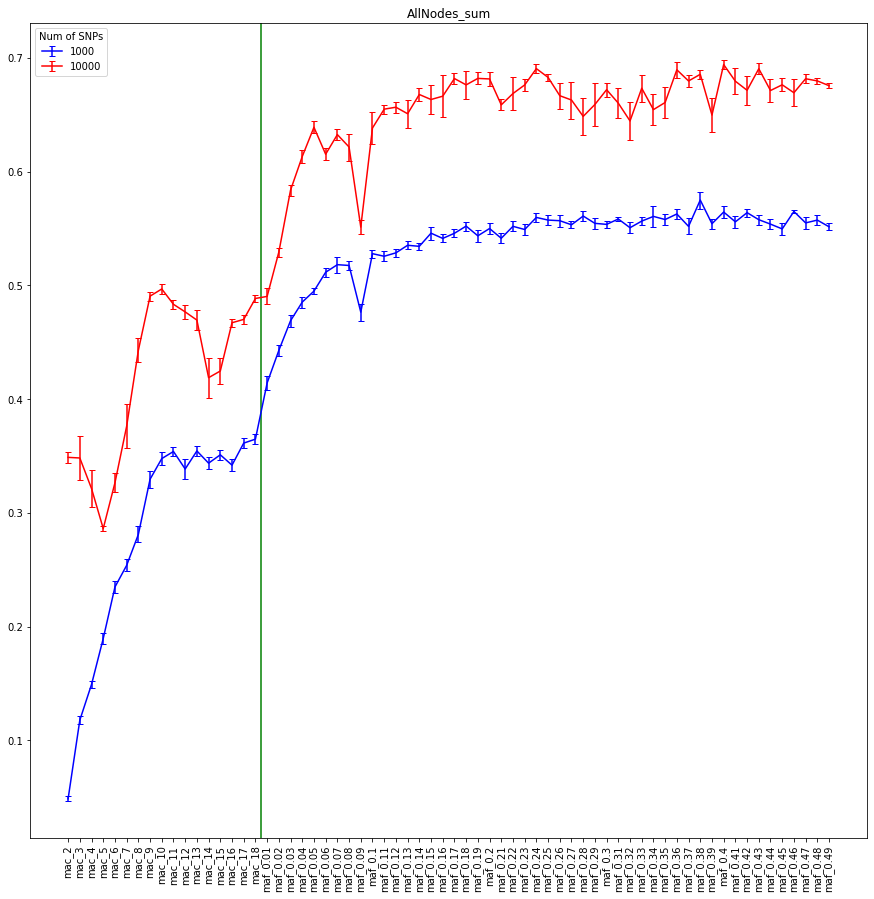

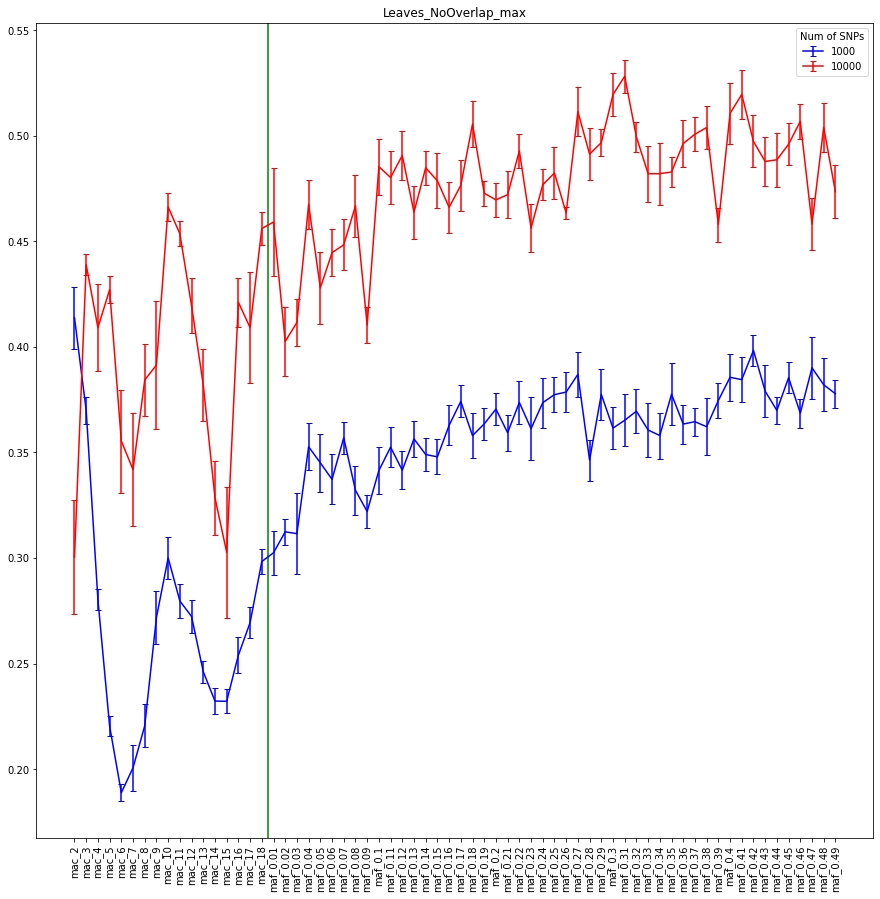

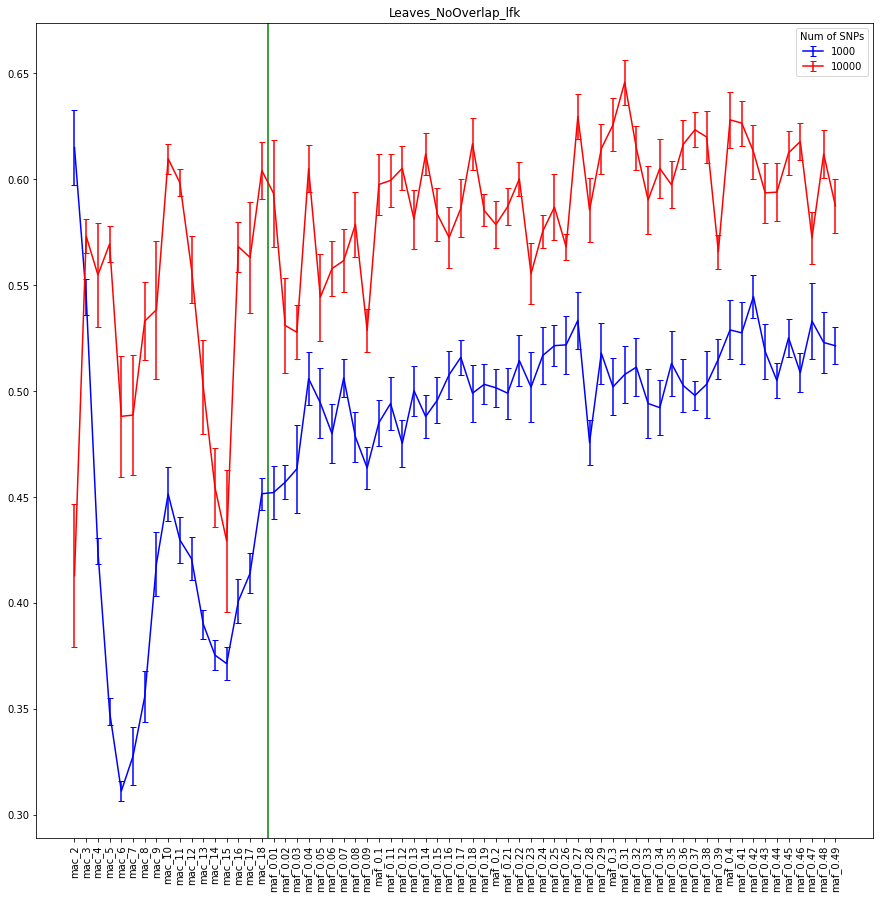

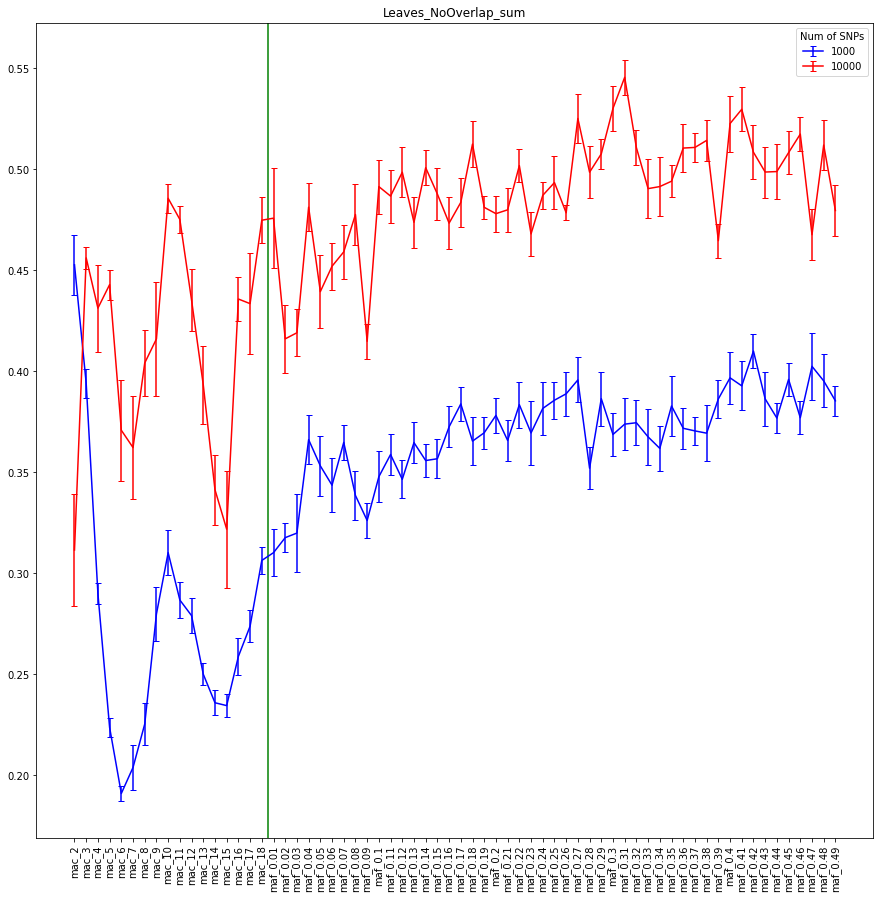

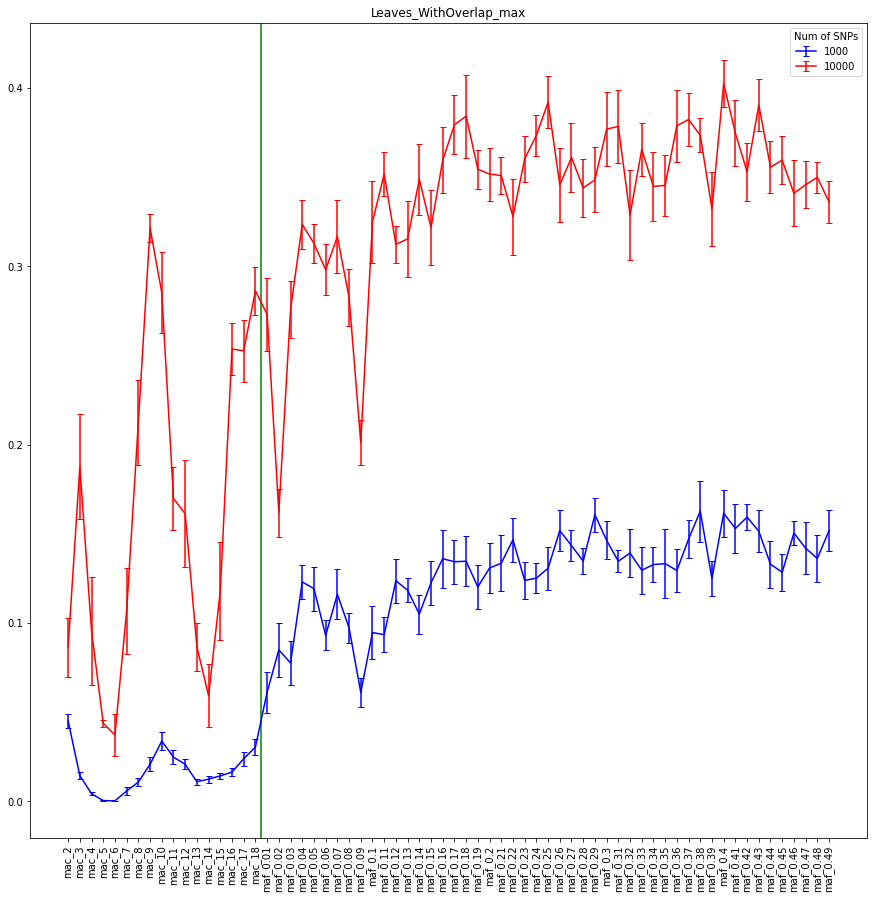

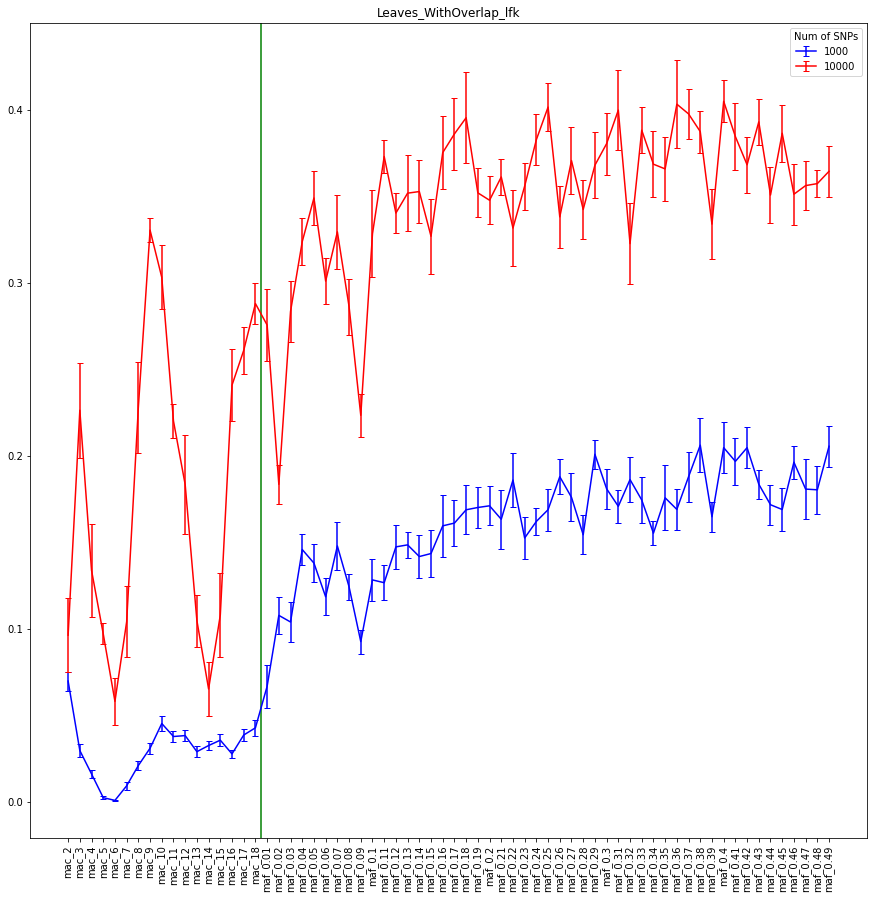

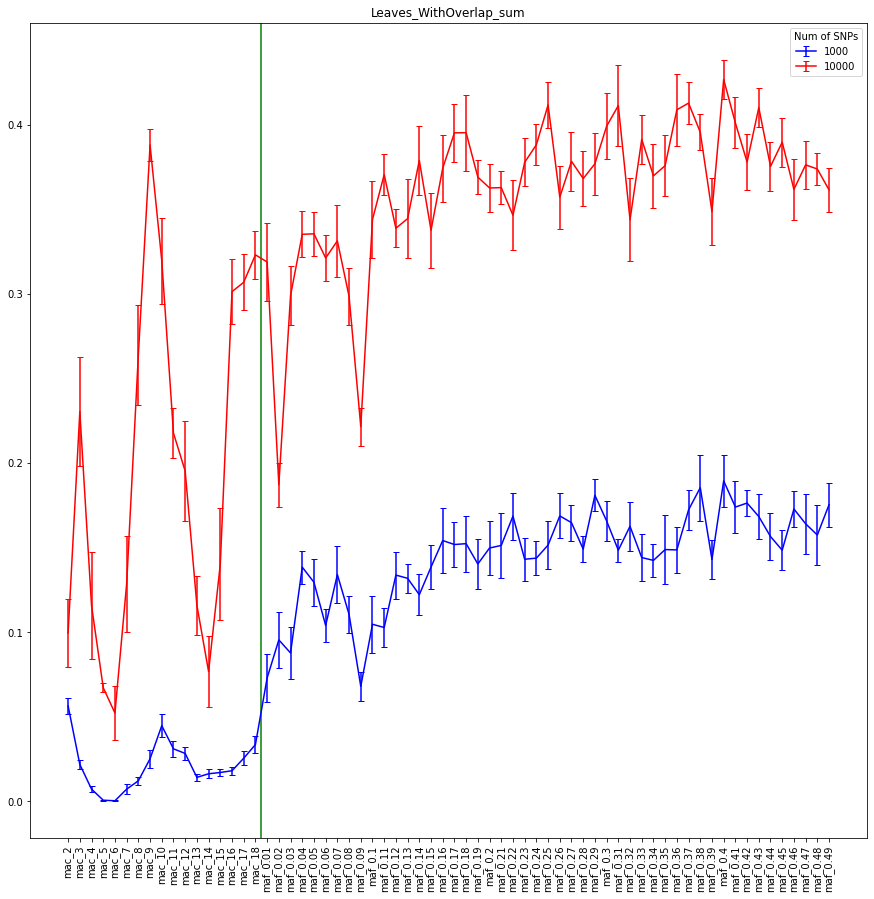

In [52]:
for score in ALL_SCORES_TYPES:
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    ax = f.add_subplot(111)
    for num_of_snp in [1000, 10000]:
        avg = [] 
        std = []
        for mac_maf in ['mac', 'maf']:
            is_mac = mac_maf == 'mac'
            min_range = mac_min_range if is_mac else maf_min_range
            max_range = mac_max_range if is_mac else maf_max_range
            if min_range>0:
                for val in range(min_range, max_range+1):
                    # in maf we take 0.x
                    if not is_mac:
                        val = f'{val * 1.0/100}'
                    class_name = f'ss_{ns_ss}_{mac_maf}_{val}_{num_of_snp}'
                    class_values = df[df.Class == class_name]
                    n = int(class_values['num_of_trees'])
                    avg.append(float(class_values[f'{score}_avg']))
                    std.append(float(class_values[f'{score}_std']) / np.sqrt(n)) / np.sqrt(n
        plt.errorbar(class_names, avg, yerr=np.array(std), fmt='-', capsize=3, color=SIZE2COLOR_DICT[num_of_snp], label=num_of_snp)
    plt.xticks(rotation=90)
    plt.axvline(x=16.5, color='green')
    plt.legend(title="Num of SNPs")
    plt.title(f'{score}')
    plt.savefig(f'{summay_dir}fix_size_nmi_scores/{score}.png')
    